Extracting Dataset using Kaggle API

In [2]:
# installing the Kaggle library
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [9]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 98% 801M/814M [00:11<00:00, 54.3MB/s]
100% 814M/814M [00:11<00:00, 71.3MB/s]


In [10]:
!ls

dogs-vs-cats-redux-kernels-edition.zip	kaggle.json  sample_data


In [11]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats-redux-kernels-edition.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [12]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [13]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [14]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.11926.jpg', 'dog.3974.jpg', 'dog.10696.jpg', 'cat.4438.jpg', 'dog.3824.jpg', 'cat.6091.jpg', 'dog.12210.jpg', 'dog.4664.jpg', 'cat.10517.jpg', 'cat.6128.jpg', 'cat.10657.jpg', 'cat.3875.jpg', 'dog.5075.jpg', 'cat.4336.jpg', 'dog.3964.jpg', 'cat.8793.jpg', 'cat.1702.jpg', 'cat.9290.jpg', 'cat.558.jpg', 'dog.8788.jpg', 'cat.5154.jpg', 'cat.186.jpg', 'dog.4890.jpg', 'cat.3218.jpg', 'dog.6439.jpg', 'cat.7775.jpg', 'cat.286.jpg', 'dog.2898.jpg', 'dog.443.jpg', 'cat.3086.jpg', 'dog.390.jpg', 'cat.2949.jpg', 'cat.10751.jpg', 'cat.7968.jpg', 'dog.10470.jpg', 'cat.9311.jpg', 'dog.11516.jpg', 'dog.2477.jpg', 'dog.6467.jpg', 'dog.2406.jpg', 'dog.544.jpg', 'dog.2669.jpg', 'dog.3130.jpg', 'cat.2652.jpg', 'cat.8830.jpg', 'dog.4663.jpg', 'dog.2928.jpg', 'cat.198.jpg', 'cat.11336.jpg', 'cat.6097.jpg', 'dog.7212.jpg', 'dog.5048.jpg', 'dog.1873.jpg', 'dog.11304.jpg', 'dog.7859.jpg', 'cat.11470.jpg', 'dog.8715.jpg', 'dog.7229.jpg', 'cat.9584.jpg', 'cat.5410.jpg', 'dog.1290.jpg', 'dog.6659.jpg', 'do

Importing the Dependencies

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

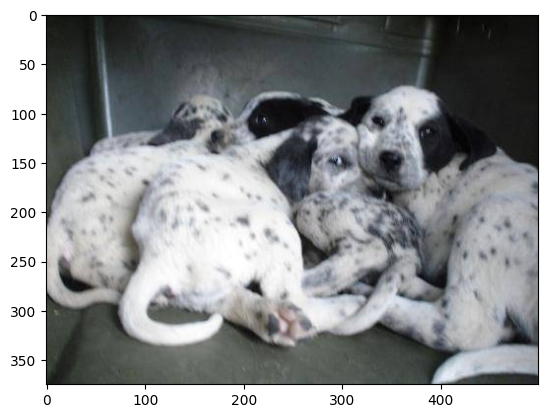

In [16]:
# display dog image
img = mpimg.imread('/content/train/dog.3824.jpg')
imgplt = plt.imshow(img)
plt.show()

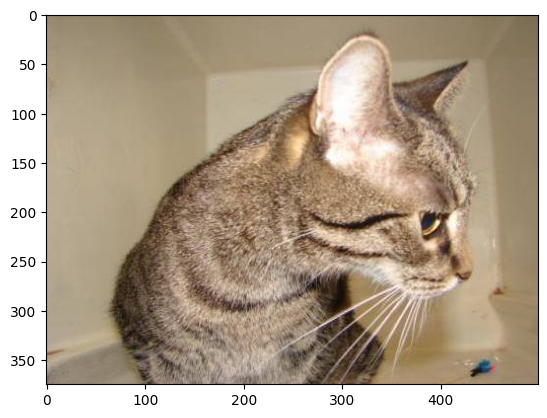

In [17]:
# display cat image
img = mpimg.imread('/content/train/cat.6091.jpg')
imgplt = plt.imshow(img)
plt.show()

In [18]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



dog
dog
dog
cat
dog


In [19]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [20]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [21]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

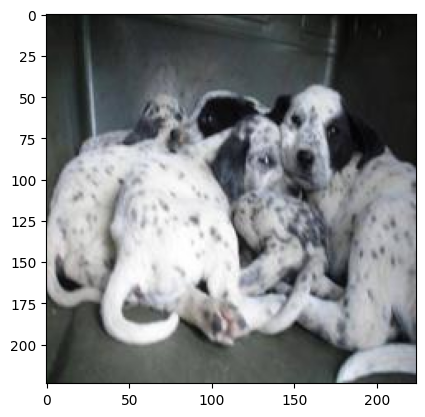

In [22]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.3824.jpg')
imgplt = plt.imshow(img)
plt.show()

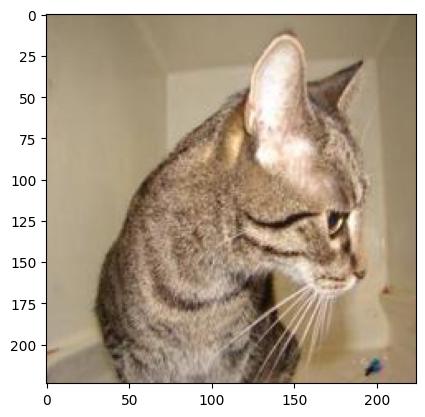

In [23]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.6091.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [24]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [25]:
print(filenames[0:5])
print(len(filenames))

['dog.11926.jpg', 'dog.3974.jpg', 'dog.10696.jpg', 'cat.4438.jpg', 'dog.3824.jpg']
2000


In [26]:
print(labels[0:5])
print(len(labels))

[1, 1, 1, 0, 1]
2000


In [27]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 959 1041]


Converting all the resized images to numpy arrays

In [28]:
import cv2
import glob

In [29]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [30]:
print(dog_cat_images)

[[[[ 34  38  49]
   [ 34  38  49]
   [ 34  38  49]
   ...
   [ 98 127 158]
   [ 99 128 159]
   [ 99 128 159]]

  [[ 34  38  49]
   [ 34  38  49]
   [ 34  38  49]
   ...
   [ 98 127 158]
   [ 99 128 159]
   [ 99 128 159]]

  [[ 34  38  49]
   [ 34  38  49]
   [ 34  38  49]
   ...
   [ 98 127 158]
   [ 99 128 159]
   [ 99 128 159]]

  ...

  [[ 32  37  46]
   [ 32  37  46]
   [ 32  37  46]
   ...
   [ 63 103 145]
   [ 65 105 147]
   [ 67 107 149]]

  [[ 32  37  46]
   [ 32  37  46]
   [ 32  37  46]
   ...
   [ 61 101 143]
   [ 62 102 144]
   [ 64 104 146]]

  [[ 32  37  46]
   [ 32  37  46]
   [ 32  37  46]
   ...
   [ 60 100 142]
   [ 59  99 141]
   [ 61 101 143]]]


 [[[194 249 246]
   [169 226 223]
   [171 230 226]
   ...
   [186 172 160]
   [190 174 162]
   [192 176 164]]

  [[186 239 236]
   [185 240 237]
   [185 242 239]
   ...
   [188 174 162]
   [192 176 164]
   [193 177 165]]

  [[185 235 233]
   [176 229 226]
   [182 237 234]
   ...
   [187 171 159]
   [190 174 162]
   [193 177

In [31]:
type(dog_cat_images)

numpy.ndarray

In [32]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [33]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [36]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [37]:
print(X_train_scaled)

[[[[0.31372549 0.29803922 0.32156863]
   [0.31764706 0.30196078 0.3254902 ]
   [0.32941176 0.31372549 0.3372549 ]
   ...
   [0.65490196 0.62352941 0.59607843]
   [0.64313725 0.61176471 0.58431373]
   [0.63529412 0.60392157 0.57647059]]

  [[0.3254902  0.30980392 0.33333333]
   [0.32941176 0.31372549 0.3372549 ]
   [0.34117647 0.3254902  0.34901961]
   ...
   [0.69803922 0.66666667 0.63921569]
   [0.68235294 0.65098039 0.62352941]
   [0.67843137 0.64705882 0.61960784]]

  [[0.3254902  0.31764706 0.34117647]
   [0.33333333 0.3254902  0.34901961]
   [0.34509804 0.3372549  0.36078431]
   ...
   [0.74901961 0.71372549 0.69803922]
   [0.7372549  0.70588235 0.67843137]
   [0.72941176 0.69803922 0.67058824]]

  ...

  [[0.19607843 0.19215686 0.20784314]
   [0.19215686 0.18823529 0.20392157]
   [0.19607843 0.2        0.21568627]
   ...
   [0.18823529 0.1372549  0.14509804]
   [0.17647059 0.1254902  0.13333333]
   [0.11764706 0.06666667 0.0745098 ]]

  [[0.1254902  0.12156863 0.1372549 ]
   [0.1

**Building the Neural Network**

In [38]:
import tensorflow as tf
import tensorflow_hub as hub

In [39]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [40]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [41]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [42]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 40s 739ms/step - loss: 0.1597 - acc: 0.9425
Epoch 2/5
50/50 [==============================] - 32s 647ms/step - loss: 0.0688 - acc: 0.9762
Epoch 3/5
50/50 [==============================] - 31s 622ms/step - loss: 0.0534 - acc: 0.9844
Epoch 4/5
50/50 [==============================] - 32s 646ms/step - loss: 0.0396 - acc: 0.9887
Epoch 5/5
50/50 [==============================] - 31s 630ms/step - loss: 0.0338 - acc: 0.9912


In [43]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 8s 552ms/step - loss: 0.0925 - acc: 0.9700
Test Loss = 0.09245937317609787
Test Accuracy = 0.9700000286102295


**Predictive System**

Path of the image to be predicted: /content/download.jpg


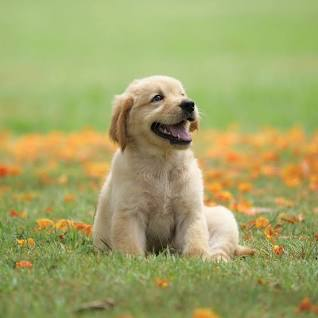

1/1 [==============================] - 1s 551ms/step
[[-1.7134103  3.2509854]]
1
The image represents a Dog


In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/images.jpg


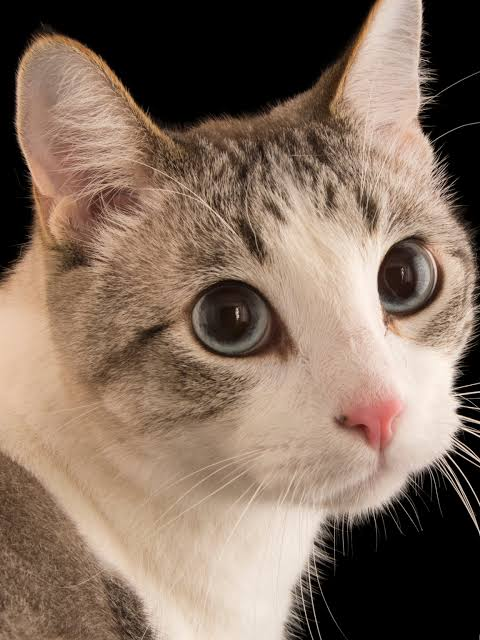

1/1 [==============================] - 0s 49ms/step
[[ 5.6018133 -5.3226767]]
0
The image represents a Cat


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')